In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams["figure.figsize"] = (7, 5)

In [2]:
# Load the survey data
df = pd.read_excel("Cosumer_Survey.xlsx")
df.head()

1. What is your age group?  2. What is your gender?    \
0                       25–34                    Female   
1                       25–34                    Female   
2                       25–34                    Female   
3                       25–34                    Female   
4                       25–34                    Female   

  3. What is your country of residence?    \
0                                   India   
1                                   India   
2                                   India   
3                                   India   
4                                   India   

  4. How would you describe your typical monthly spending on clothing?   \
0                    I spend small amounts regularly                      
1           I spend occasionally but not every month                      
2                    I spend small amounts regularly                      
3                    I spend small amounts regularly                      
4                    I spend small amounts regularly                      

  5. How familiar are you with the concept of sustainable fashion?  \
0                                           Familiar                 
1                                  Slightly Familiar                 
2                                  Slightly Familiar                 
3                                      Very Familiar                 
4                                           Familiar                 

  6. Which of the following sustainability practices in fashion are you aware of, and have you researched them before purchasing? (Select all that apply)  \
0  Use of recycled or organic materials, Circular...                                                                                                        
1  Use of recycled or organic materials, Circular...                                                                                                        
2               Use of recycled or organic materials                                                                                                        
3               Use of recycled or organic materials                                                                                                        
4  Use of recycled or organic materials, Circular...                                                                                                        

   Recyled Materials  Circular Economy  Water/Energy  Transparency  ...  \
0                  1                 1             1             0  ...   
1                  1                 1             1             0  ...   
2                  1                 0             0             0  ...   
3                  1                 0             0             0  ...   
4                  1                 1             0             1  ...   

  Reducing waste through demand forecasting and production optimization  \
0                                                  1                      
1                                                  1                      
2                                                  0                      
3                                                  1                      
4                                                  1                      

  Enabling resource monitoring and efficiency in manufacturing  \
0                                                  1             
1                                                  1             
2                                                  0             
3                                                  1             
4                                                  1             

  Supporting recycling and reuse initiatives  \
0                                          1   
1                                          1   
2                                          1   
3                                          1   
4                     

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 26 columns):
 #   Column                                                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                                                   --------------  ----- 
 0   1. What is your age group?                                                                                                                               656 non-null    object
 1   2. What is your gender?                                                                                                                                  656 non-null    object
 2   3. What is your country of residence?                                                                                                                    656 non-null 

In [4]:
df.shape

(656, 26)

In [5]:
df.dtypes

1. What is your age group?                                                                                                                                 object
2. What is your gender?                                                                                                                                    object
3. What is your country of residence?                                                                                                                      object
4. How would you describe your typical monthly spending on clothing?                                                                                       object
5. How familiar are you with the concept of sustainable fashion?                                                                                           object
6. Which of the following sustainability practices in fashion are you aware of, and have you researched them before purchasing? (Select all that apply)    object
Recyled Materials           

In [6]:
df.isnull().sum()

1. What is your age group?                                                                                                                                 0
2. What is your gender?                                                                                                                                    0
3. What is your country of residence?                                                                                                                      0
4. How would you describe your typical monthly spending on clothing?                                                                                       0
5. How familiar are you with the concept of sustainable fashion?                                                                                           0
6. Which of the following sustainability practices in fashion are you aware of, and have you researched them before purchasing? (Select all that apply)    0
Recyled Materials                                         

In [7]:
df.columns = df.columns.str.strip()

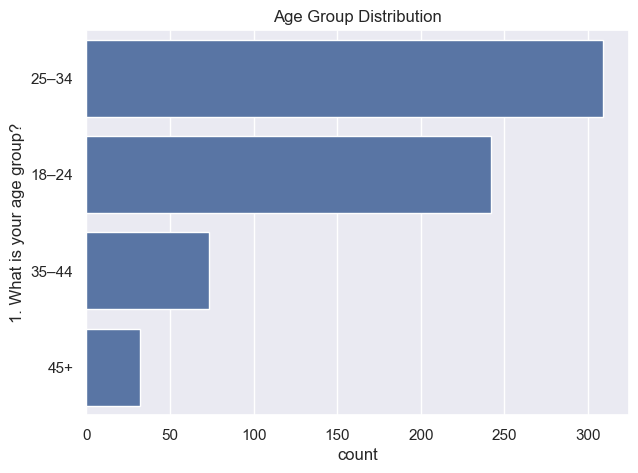

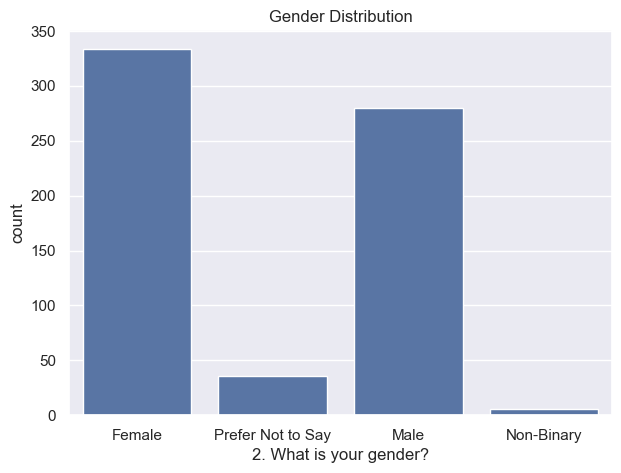

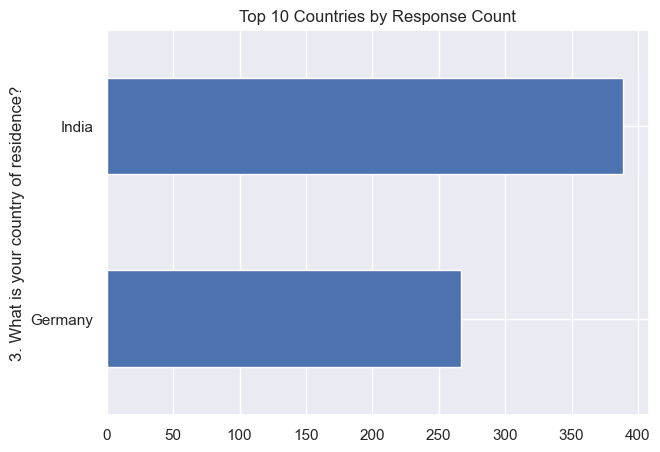

In [8]:
# ----------------------------------------
# 1. Demographic Distributions
# ----------------------------------------
# Age
sns.countplot(y=df['1. What is your age group?'], order=df['1. What is your age group?'].value_counts().index)
plt.title("Age Group Distribution")
plt.show()

# Gender
sns.countplot(x=df['2. What is your gender?'])
plt.title("Gender Distribution")
plt.show()

# Country
top_countries = df['3. What is your country of residence?'].value_counts().head(10)
top_countries.plot(kind='barh')
plt.title("Top 10 Countries by Response Count")
plt.gca().invert_yaxis()
plt.show()

Inference:
- Majority are aged 25–34, suggesting this is the key demographic for sustainable fashion. Responses from younger or older age groups are sparse.
- Predominantly female respondents. Could indicate women are more involved or interested in sustainable fashion, or reflective of sampling bias.
- India dominates response count. Regional concentration might affect tech perception (IoT/blockchain) due to availability or awareness.

Suggestion: 
- Compare age group distribution to sustainability preference.
- Cross-tab tech trust by gender for deeper insight.
- Run tech trust comparison by top 3 countries.

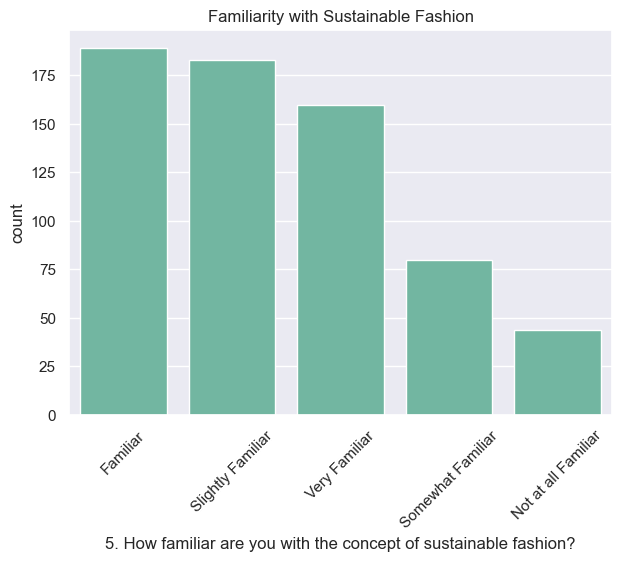

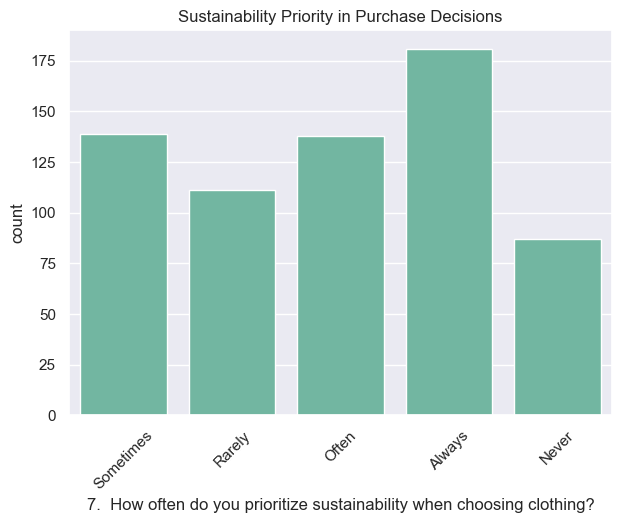

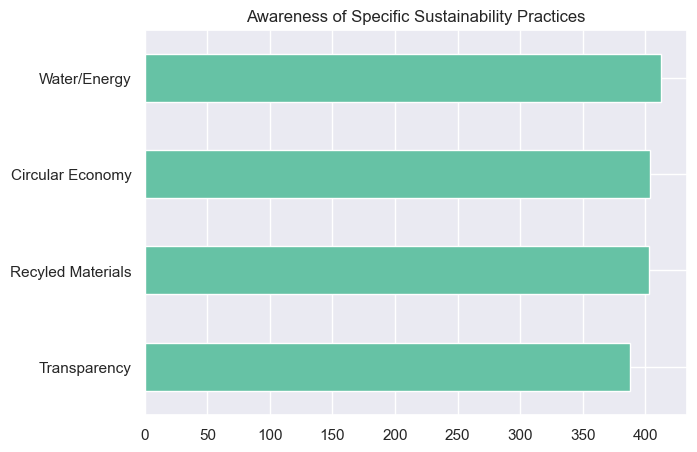

In [10]:
# ----------------------------------------
# 2. Sustainability Awareness & Behavior
# ----------------------------------------
sns.set_palette('Set2')
# Familiarity with sustainable fashion
sns.countplot(x=df['5. How familiar are you with the concept of sustainable fashion?'])
plt.title("Familiarity with Sustainable Fashion")
plt.xticks(rotation=45)
plt.show()

# Priority given to sustainability
sns.countplot(x=df['7.  How often do you prioritize sustainability when choosing clothing?'])
plt.title("Sustainability Priority in Purchase Decisions")
plt.xticks(rotation=45)
plt.show()

# Awareness of sustainability practices
practice_cols = ['Recyled Materials', 'Circular Economy', 'Water/Energy', 'Transparency']
df[practice_cols].sum().sort_values().plot(kind='barh')
plt.title("Awareness of Specific Sustainability Practices")
plt.show()

Inference:
- Majority are familiar or slightly familiar, suggesting good base awareness.
- Many respondents always, sometimes or often prioritize sustainability — shows intent but possible action gap.
- Most are aware of Water/Energy and Circular Economy, while Transparency scores lowest.

Suggestion:
- EDA: Correlate this with actual sustainable purchasing behaviors.
- EDA: Segment this by age or spending.
- EDA: Cross-tab tech roles vs. transparency awareness.

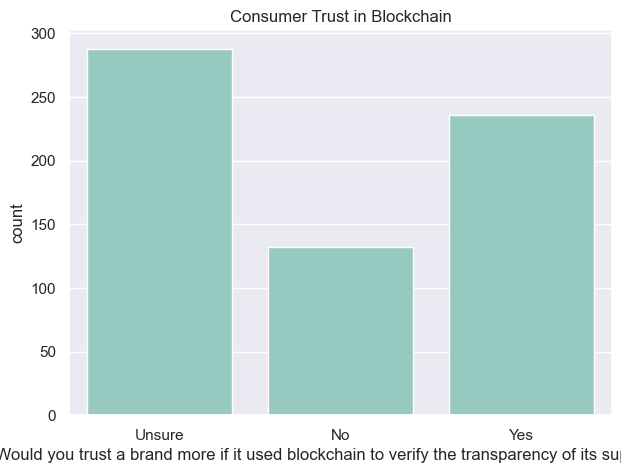

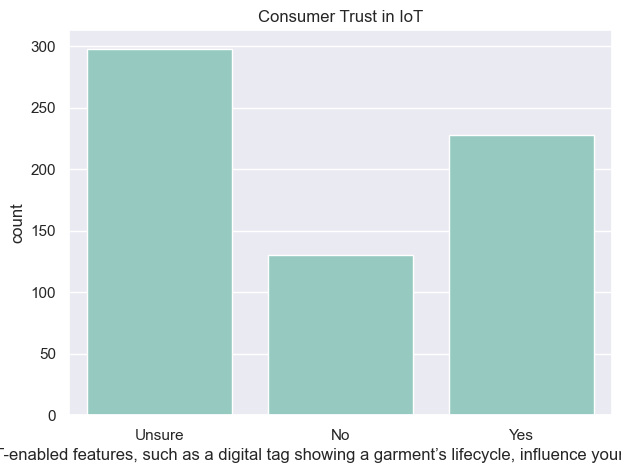

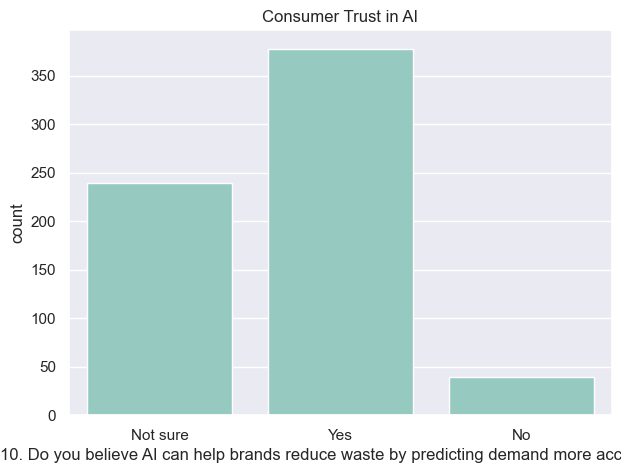

In [12]:
# ----------------------------------------
# 3. Trust in Emerging Technologies
# ----------------------------------------
sns.set_palette('Set3')
tech_cols = {
    'Blockchain': '8. Would you trust a brand more if it used blockchain to verify the transparency of its supply chain?',
    'IoT': '9. Would IoT-enabled features, such as a digital tag showing a garment’s lifecycle, influence your purchase decision?',
    'AI': '10. Do you believe AI can help brands reduce waste by predicting demand more accurately?'
}
for tech, col in tech_cols.items():
    sns.countplot(x=df[col])
    plt.title(f"Consumer Trust in {tech}")
    plt.show()

Inference:
- Mixed trust — some say yes, others maybe. Indicates potential education barrier or skepticism.
- Higher trust for IoT tags — perceived as visual/verifiable. Easier for consumers to understand.
- Majority agree AI can reduce waste. Indicates optimism for predictive tech.

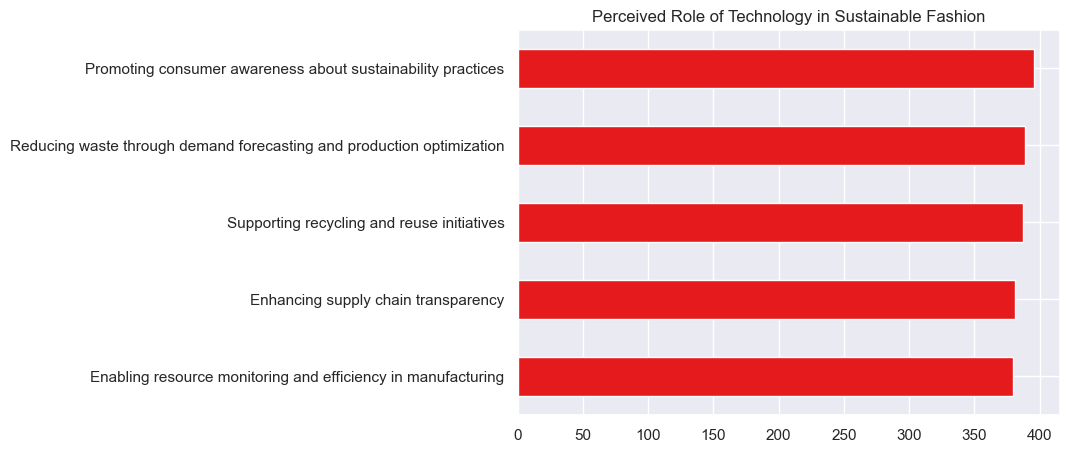

In [14]:
# ----------------------------------------
# 4. Tech Roles in Sustainable Fashion
# ----------------------------------------
sns.set_palette('Set1')
tech_role_cols = [
    'Enhancing supply chain transparency',
    'Reducing waste through demand forecasting and production optimization',
    'Enabling resource monitoring and efficiency in manufacturing',
    'Supporting recycling and reuse initiatives',
    'Promoting consumer awareness about sustainability practices'
]
df[tech_role_cols].sum().sort_values().plot(kind='barh')
plt.title("Perceived Role of Technology in Sustainable Fashion")
plt.show()

Inference:
- Consumer Awareness and demand forecasting are top tech roles. Indicates data traceability matters.

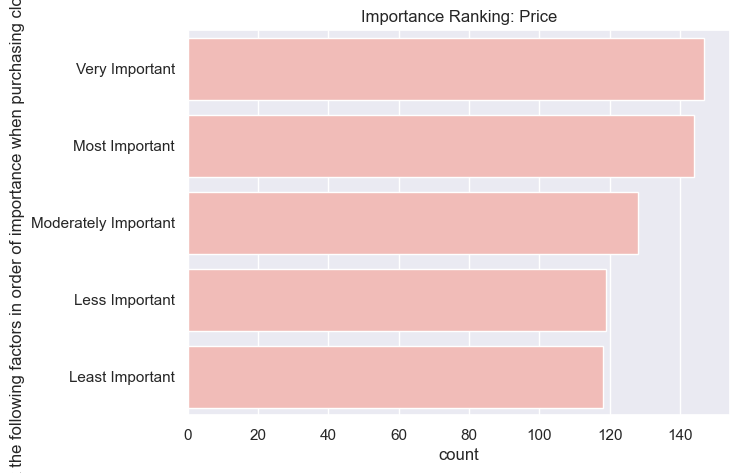

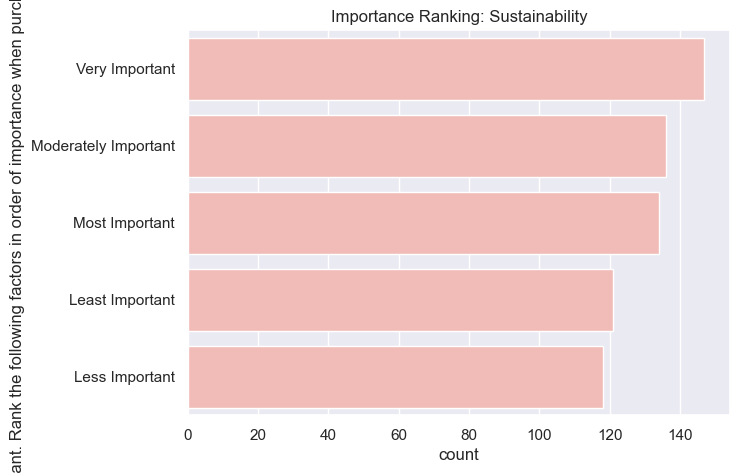

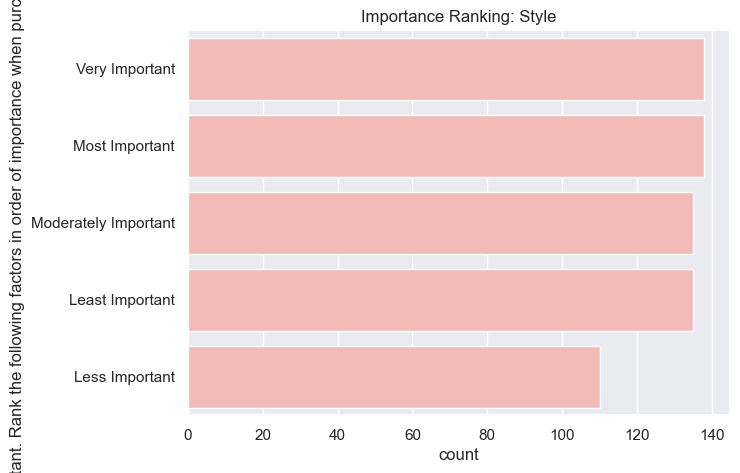

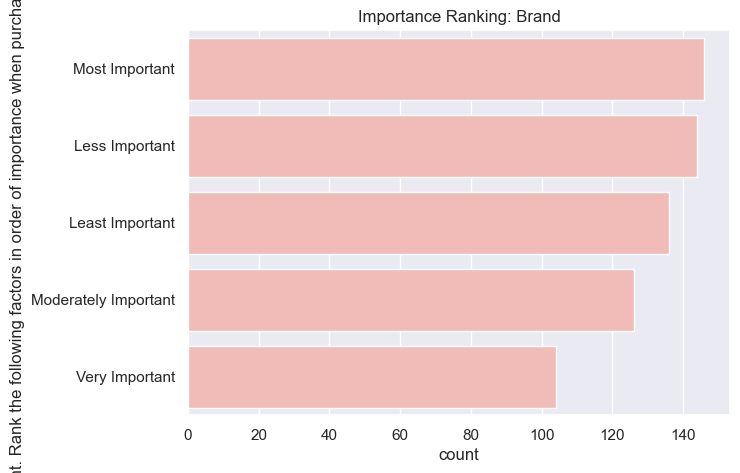

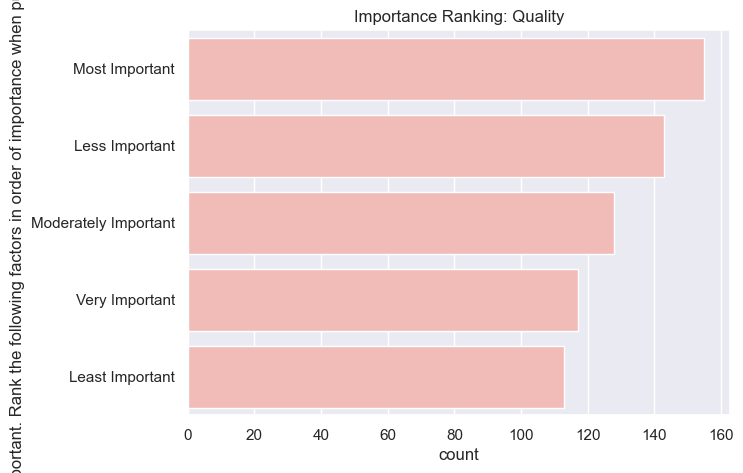

In [16]:
# ----------------------------------------
# 5. Decision Factor Rankings
# ----------------------------------------
sns.set_palette('Pastel1')
rank_cols = {
    'Price': '12. Rank the following factors in order of importance when purchasing clothing [Price]',
    'Sustainability': 'Most ImportantVery Important. Rank the following factors in order of importance when purchasing clothing [Sustainability]',
    'Style': 'Most ImportantVery Important. Rank the following factors in order of importance when purchasing clothing [Style/Design]',
    'Brand': 'Most ImportantVery Important. Rank the following factors in order of importance when purchasing clothing [Brand Reputation]',
    'Quality': 'Most ImportantVery Important. Rank the following factors in order of importance when purchasing clothing [Quality]'
}
for name, col in rank_cols.items():
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Importance Ranking: {name}")
    plt.show()

Inference:
- Quality is rated highest.
- Sustainability ranks below Style and Brand for many, indicating an intention-action mismatch.

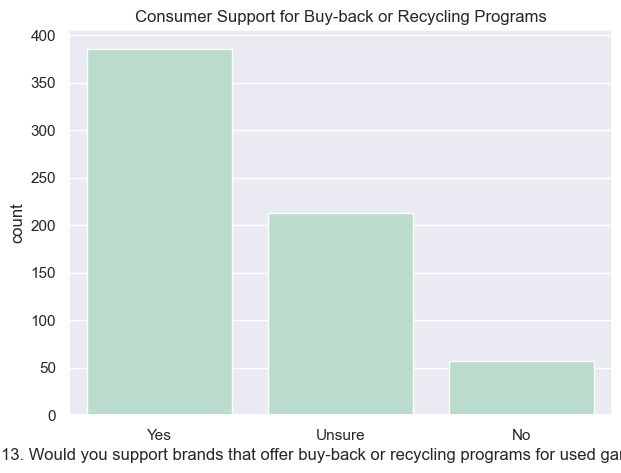

In [18]:
# ----------------------------------------
# 6. Support for Buy-Back/Recycling
# ----------------------------------------
sns.set_palette('Pastel2')
sns.countplot(x=df['13. Would you support brands that offer buy-back or recycling programs for used garments?'])
plt.title("Consumer Support for Buy-back or Recycling Programs")
plt.show()

Inference:
- Majority support this — shows demand for circular fashion initiatives.

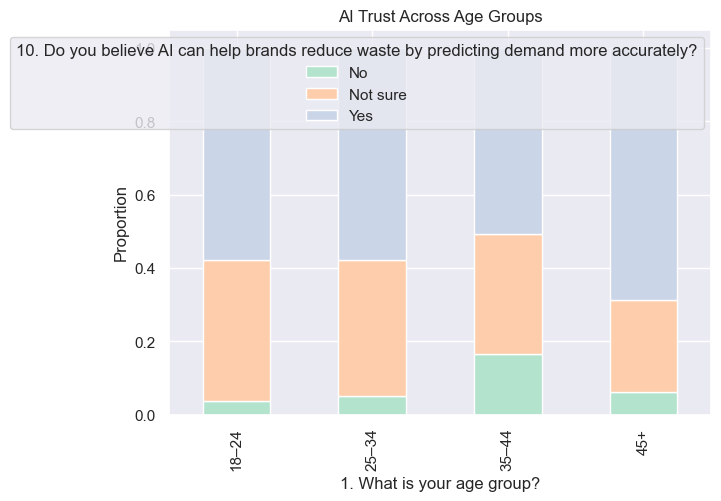

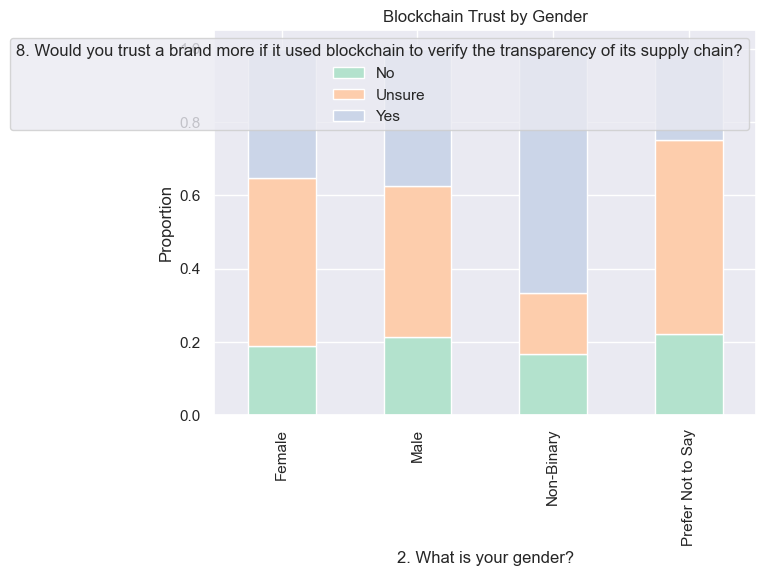

In [20]:
# ----------------------------------------
# 7. Cross-tab Examples (Optional deeper insights)
# ----------------------------------------
pd.crosstab(df['1. What is your age group?'], df[tech_cols['AI']], normalize='index').plot(kind='bar', stacked=True)
plt.title("AI Trust Across Age Groups")
plt.ylabel("Proportion")
plt.show()

pd.crosstab(df['2. What is your gender?'], df[tech_cols['Blockchain']], normalize='index').plot(kind='bar', stacked=True)
plt.title("Blockchain Trust by Gender")
plt.ylabel("Proportion")
plt.show()

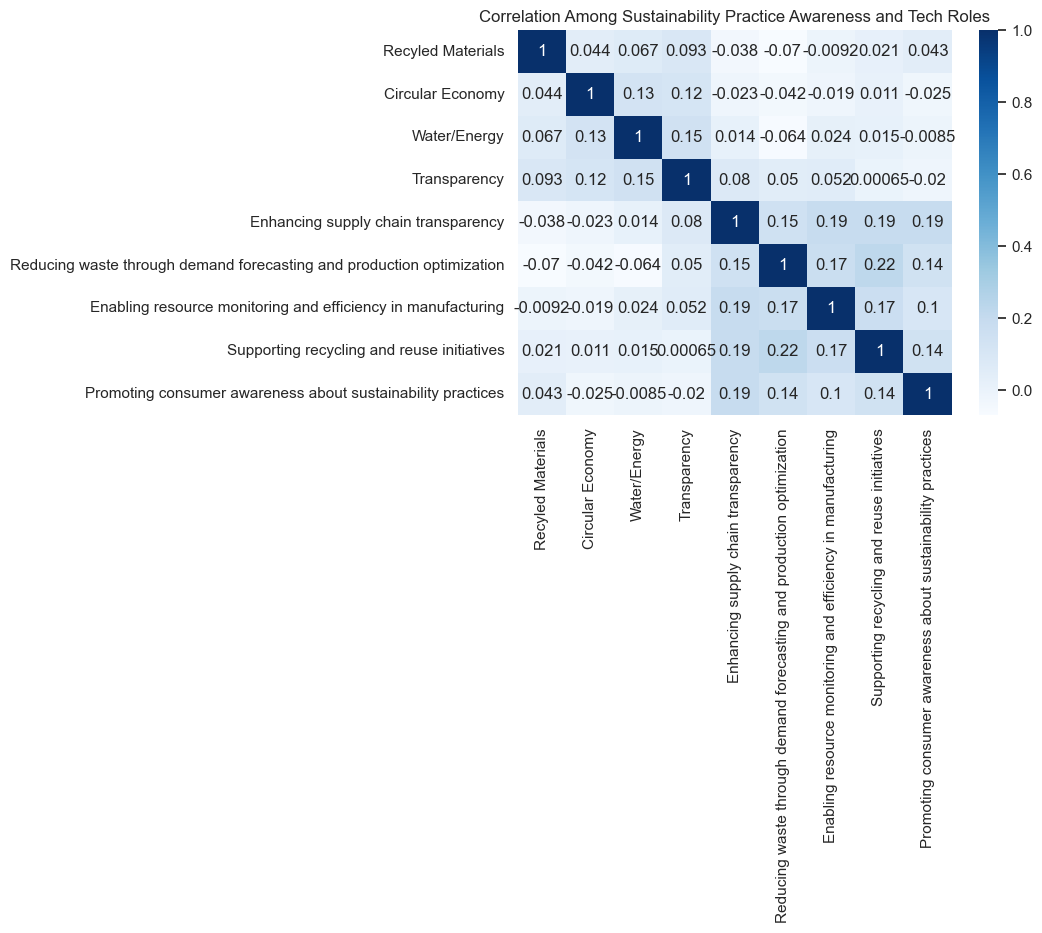

In [21]:
# ----------------------------------------
# 8. Correlation Heatmap (Binary columns only)
# ----------------------------------------
binary_cols = df[practice_cols + tech_role_cols].astype(int)
sns.heatmap(binary_cols.corr(), annot=True, cmap="Blues")
plt.title("Correlation Among Sustainability Practice Awareness and Tech Roles")
plt.show()

C:\Users\harin\AppData\Local\Temp\ipykernel_22512\2785738965.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_likert = df[[rank_cols[k] for k in rank_cols]].rename(columns=rank_cols).replace(likert_map)


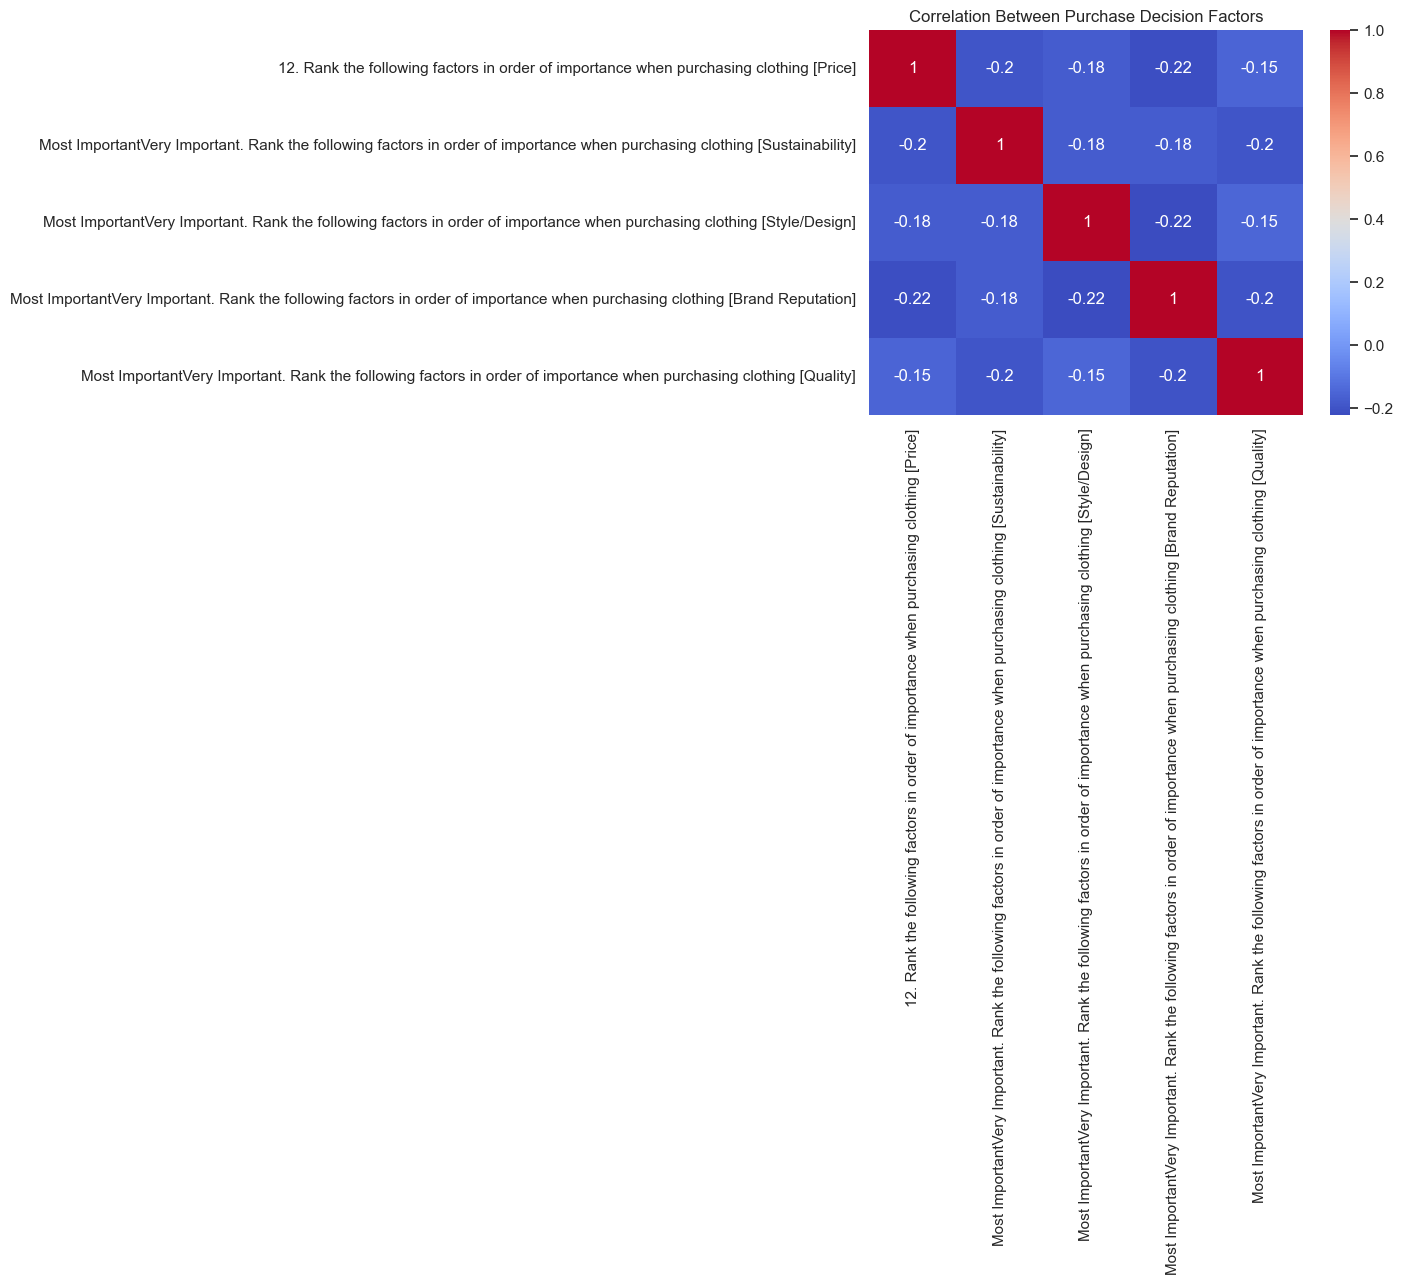

In [22]:
# ----------------------------------------
# 9. Likert Scale Re-encoding & Heatmap
# ----------------------------------------
# Convert Likert responses to an ordinal scale for analysis
# Full corrected block
likert_map = {
    'Not Important': 1,
    'Least Important': 1,
    'Less Important': 2,
    'Moderately Important': 3,
    'Very Important': 4,
    'Most Important': 5
}

df_likert = df[[rank_cols[k] for k in rank_cols]].rename(columns=rank_cols).replace(likert_map)
sns.heatmap(df_likert.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Purchase Decision Factors")
plt.show()

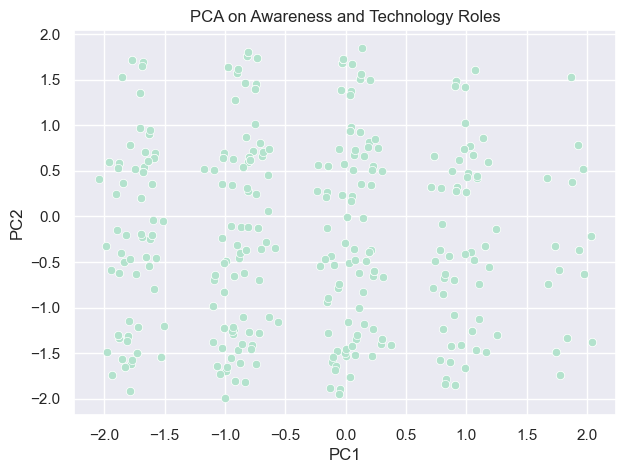

Explained Variance Ratio: [0.18707577 0.14621379]


In [23]:
# ----------------------------------------
# 10. Principal Component Analysis (PCA) on Awareness + Tech Roles
# ----------------------------------------
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Prepare data
X = df[practice_cols + tech_role_cols]
X_std = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
components = pca.fit_transform(X_std)

# Plot
pca_df = pd.DataFrame(components, columns=['PC1', 'PC2'])
sns.scatterplot(data=pca_df, x='PC1', y='PC2')
plt.title("PCA on Awareness and Technology Roles")
plt.show()

# Variance explained
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Inference:
- PC1 & PC2 together explain ~33% variance — a good start.
- Shows mixed consumer patterns — more components may help.

In [25]:
# ----------------------------------------
# 11. Chi-Square Tests – Is belief in AI or Blockchain independent of gender?
# ----------------------------------------
from scipy.stats import chi2_contingency

# Example: Gender vs Blockchain Trust
contingency = pd.crosstab(df['2. What is your gender?'], df[tech_cols['Blockchain']])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-square Test: Gender vs Blockchain Trust")
print("Chi2 =", chi2, "| p-value =", p)

Chi-square Test: Gender vs Blockchain Trust
Chi2 = 6.058751946258711 | p-value = 0.4166409606073202


Inference:
- p = 0.41 → No significant gender difference in blockchain trust.

C:\Users\harin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


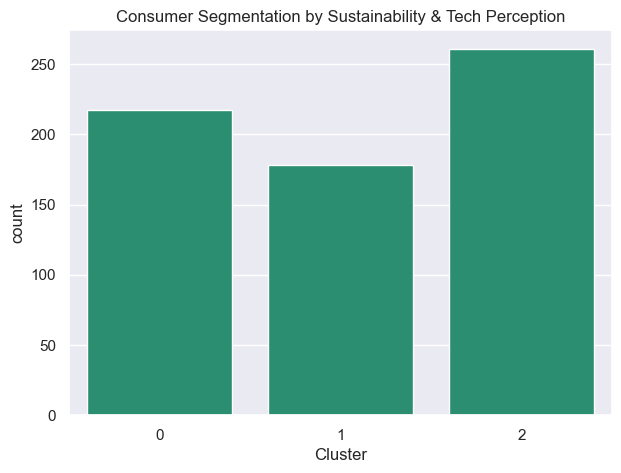

In [27]:
# ----------------------------------------
# 12. K-Means Clustering to Segment Consumers
# ----------------------------------------
sns.set_palette('Dark2')
from sklearn.cluster import KMeans

# Clustering on sustainability + tech mindset
X_cluster = df[practice_cols + tech_role_cols]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Plot clusters
sns.countplot(x='Cluster', data=df)
plt.title("Consumer Segmentation by Sustainability & Tech Perception")
plt.show()

Inference:
- Segments are visible — good for profiling sustainability mindsets.
- Use t-SNE color codes to label segments descriptively (e.g., "Tech-Adopters", "Skeptics").

In [29]:
# ----------------------------------------
# 13. Association Between Spending and Tech Adoption (ANOVA)
# ----------------------------------------
import scipy.stats as stats

# Convert spending categories to numerical
spending_order = df['4. How would you describe your typical monthly spending on clothing?'].unique().tolist()
df['Spending_Code'] = df['4. How would you describe your typical monthly spending on clothing?'].apply(lambda x: spending_order.index(x))

# ANOVA: Spending vs Trust in AI
grouped = [df[df[tech_cols['AI']] == val]['Spending_Code'] for val in df[tech_cols['AI']].unique()]
f, p = stats.f_oneway(*grouped)
print("ANOVA: Spending vs AI Trust → F =", f, "| p =", p)

ANOVA: Spending vs AI Trust → F = 3.6445543005001273 | p = 0.026666071321439583


Inference: 
- p = 0.026 → Significant! Spending behavior impacts AI trust.

In [31]:
# ----------------------------------------
# 14. Radar Chart: Attitudes by Age Group
# ----------------------------------------
import plotly.express as px

radar_data = df.groupby('1. What is your age group?')[practice_cols + tech_role_cols].mean().reset_index()
fig = px.line_polar(radar_data.melt(id_vars='1. What is your age group?'), 
                    r='value', theta='variable', color='1. What is your age group?',
                    line_close=True)
fig.update_layout(title='Sustainability Awareness & Tech Role by Age Group')
fig.show()

C:\Users\harin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\harin\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



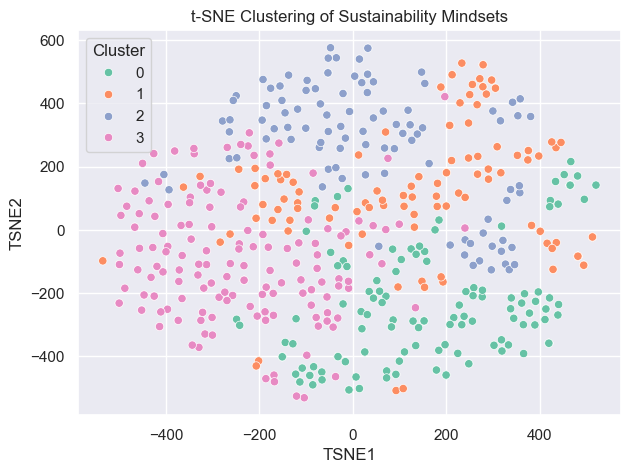

In [32]:
# ----------------------------------------
# 15. K-Means Clustering + t-SNE (Sustainability Behavior Segments)
# ----------------------------------------
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Data for clustering
cluster_vars = practice_cols + tech_role_cols
X = df[cluster_vars]
X_scaled = StandardScaler().fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# t-SNE for 2D visualization
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000, random_state=42)
tsne_results = tsne.fit_transform(X_scaled)
df['TSNE1'], df['TSNE2'] = tsne_results[:,0], tsne_results[:,1]

# Plot
sns.scatterplot(data=df, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2')
plt.title("t-SNE Clustering of Sustainability Mindsets")
plt.show()

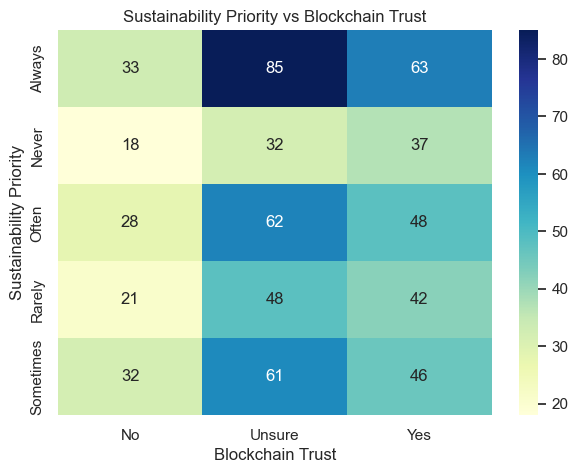

In [33]:
# ----------------------------------------
# 16. Cross-tab Heatmap: Sustainability Priority vs Blockchain Trust
# ----------------------------------------
cross_tab = pd.crosstab(df['7.  How often do you prioritize sustainability when choosing clothing?'],
                        df['8. Would you trust a brand more if it used blockchain to verify the transparency of its supply chain?'])

sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.title("Sustainability Priority vs Blockchain Trust")
plt.ylabel("Sustainability Priority")
plt.xlabel("Blockchain Trust")
plt.show()

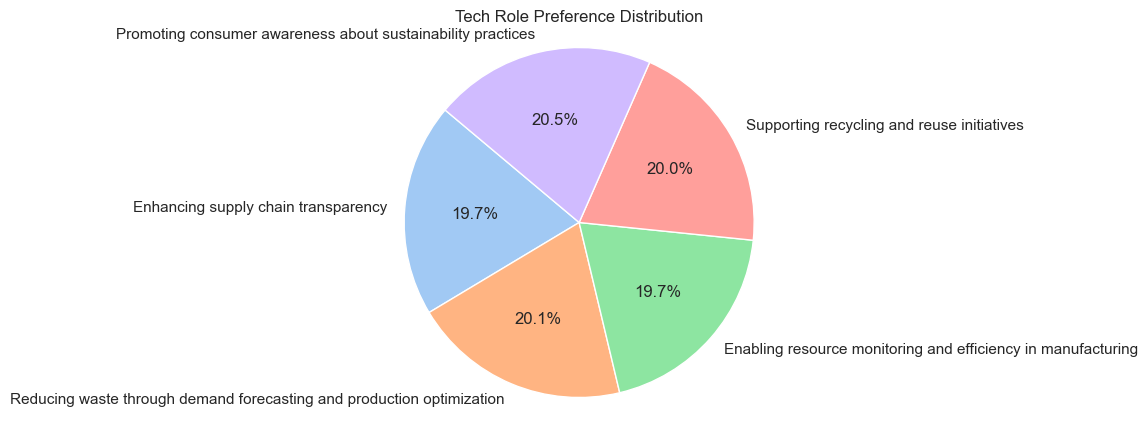

In [34]:
# ----------------------------------------
# 17. Pie Chart: Tech Role Importance Proportions
# ----------------------------------------
tech_sum = df[tech_role_cols].sum()
plt.pie(tech_sum, labels=tech_sum.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.axis('equal')
plt.title("Tech Role Preference Distribution")
plt.show()

C:\Users\harin\AppData\Local\Temp\ipykernel_22512\1893675144.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\harin\AppData\Local\Temp\ipykernel_22512\1893675144.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




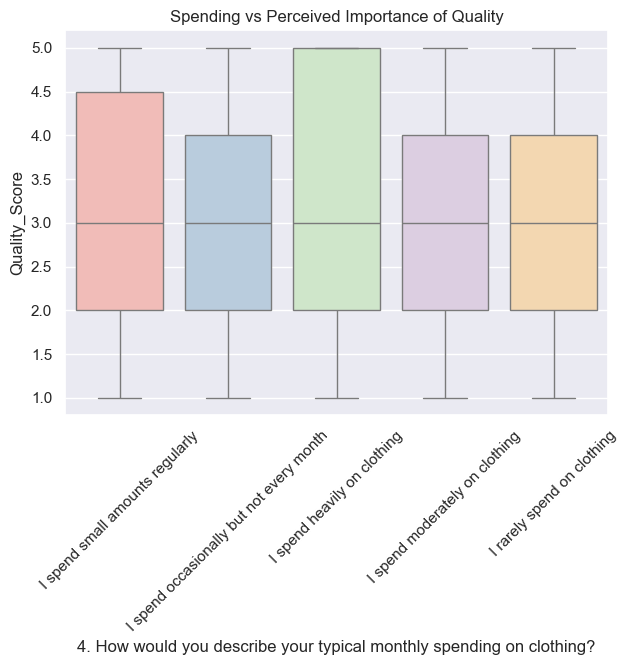

In [35]:
# ----------------------------------------
# 18. Boxplot: Spending vs Likert Ratings (e.g., Quality)
# ----------------------------------------
df['Quality_Score'] = df[rank_cols['Quality']].replace(likert_map)

sns.boxplot(x='4. How would you describe your typical monthly spending on clothing?', y='Quality_Score', data=df, palette='Pastel1')
plt.title("Spending vs Perceived Importance of Quality")
plt.xticks(rotation=45)
plt.show()